***Michael McCormack***

In the Week 04 file folder you'll find the anonymous New York op ed from September 5, 2018, together with samples of writings of the main suspects. 

Use any tools you like to figure out who wrote the op ed. If you can find more writings of these people, please send them my way.



How I approached this problem - 

Let me first say that this is a incredibly interesting problem that demonstrates a very relevant application of NLP.  I had a lot of fun doing this project. 

I began by doing some exploring on the internet.  I came across this idea of determining author based on sentence structure.  Below is an example of this idea used in a Kaggle competition.

https://www.kaggle.com/christopher22/stylometry-identify-authors-by-sentence-structure/notebook

Basically the idea is that you break down each training document by sentence and add a label for the author of each sentence.  

I start off by reading in the training files into pandas DataFrames.  I then add a column indicating the author Next I concatenate all the dataframes together so

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np




Coats = pd.read_table("Dan Coats.txt", header =None)
Coats.columns = ['text']
Coats['author'] = 'Dan Coats'

Mattis = pd.read_table("James Mattis.txt", header =None)
Mattis.columns = ['text']
Mattis['author'] = 'James Mattis'

Kelly = pd.read_table("John Kelly.txt", header =None)
Kelly.columns = ['text']
Kelly['author'] = 'John Kelly'

Hassett = pd.read_table("Kevin Hassett.txt", header =None)
Hassett.columns = ['text']
Hassett['author'] = 'Kevin Hassett'

Nielsen = pd.read_table("Kirstjen Nielsen.txt", header =None)
Nielsen.columns = ['text']
Nielsen['author'] = 'Kirstjen Nielsen'

Kudlow = pd.read_table("Larry Kudlow.txt", header =None)
Kudlow.columns = ['text']
Kudlow['author'] = 'Larry Kudlow'

Pence = pd.read_table("Mike Pence.txt", header =None)
Pence.columns = ['text']
Pence['author'] = 'Mike Pence'

Pompeo = pd.read_table("Mike Pompeo.txt", header =None)
Pompeo.columns = ['text']
Pompeo['author'] = 'Mike Pompeo'

train = pd.DataFrame()
train = pd.concat([Coats, Mattis,Kelly,Hassett,Nielsen,Kudlow,Pence,Pompeo])

author_to_num ={'Dan Coats': "Chicken", 'James Mattis': "Punk", 
                'John Kelly': "perp", 'Kevin Hassett': "Garbage",
                  'Kirstjen Nielsen': "Scum", 'Larry Kudlow': "Toilet", 
                'Mike Pence': "Poop", 'Mike Pompeo': "Yuck"}

train["author"].replace(author_to_num, inplace=True)

# Convert the author strings into numbers
#train['author'] = train['author'].apply(lambda x: possibleAuthors[x])
#print(train)


text = train['text'].tolist()  # sentences
author = train['author'].tolist()
print("there are ", len(text), "sentences")

there are  847 sentences


In [6]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=3)
vectors = vectorizer.fit_transform(text)
print("the tf-idf vectors have ", vectors.shape[-1], "dimensions")


# tvect = TfidfVectorizer(min_df=1, max_df=1)
# X_train = tvect.fit_transform(text)

# #X_train, X_test, y_train, y_test = train_test_split(vectors, author, test_size=0.2, random_state=1337)


# svm = LinearSVC()
# svm.fit(X_train, author)

### Test the model
X_train, X_test, y_train, y_test = train_test_split(vectors, author, test_size=0.25, random_state=1337)
svm = LinearSVC()
svm.fit(X_train, y_train)

predictions = svm.predict(X_test)
#print(list(predictions[0:10]))
 
from sklearn.metrics import accuracy_score
print("The Linear SVC model is accurate: ", round((accuracy_score(y_test, predictions) *100),2), "% of the time.")

# predictions = svm.predict(X_test)
# print(list(predictions[0:10]))
# print(y_test[:10])

the tf-idf vectors have  2332 dimensions
The Linear SVC model is accurate:  84.91 % of the time.


In [7]:
opEd = pd.read_table("OpEd.txt", header =None)
opEd.columns = ['text']

test = opEd['text'].tolist()

X_test=vectorizer.transform(test)

# testVector = vectorizer.fit_transform(test)
# X_test=vectorizer.transform(test)
# print(vectors.shape)


predictions = svm.predict(X_test)

#predictedAuthor = mode(predictions)


predictedAuthordf = pd.DataFrame(predictions)
predictedAuthordf.columns = ['Author']
predictedAuthordf = predictedAuthordf['Author'].value_counts().reset_index()
predictedAuthordf = pd.DataFrame(predictedAuthordf)
predictedAuthordf.columns = ['Author','Count']
predictedAuthordf["Probability"] = predictedAuthordf["Count"]/(predictedAuthordf['Count'].sum())
predictedAuthordf["logLikelihood"] = np.log( predictedAuthordf["Probability"])

prediction = predictedAuthordf['logLikelihood'].idxmax()
predictedAuthor = predictedAuthordf.at[prediction,'Author']

print(predictedAuthordf,"\n\n")


#predictedAuthor = (list(possibleAuthors.keys())[list(possibleAuthors.values()).index(predictedAuthor)]) 
print("The predicted author is: ", predictedAuthor)

    Author  Count  Probability  logLikelihood
0     perp     10     0.370370      -0.993252
1   Toilet      7     0.259259      -1.349927
2     Yuck      4     0.148148      -1.909543
3  Garbage      4     0.148148      -1.909543
4  Chicken      2     0.074074      -2.602690 


The predicted author is:  perp


Visualizing prediction distribution

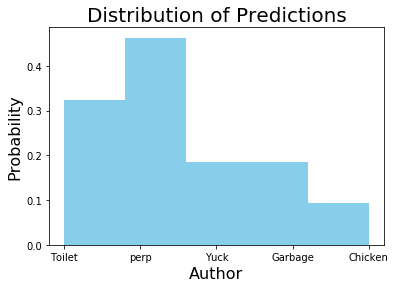

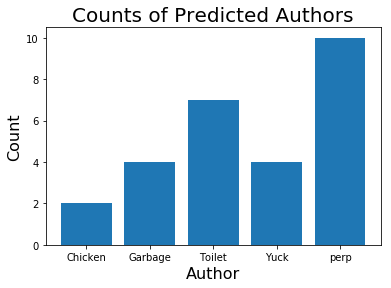

In [8]:


bins = len(set(predictions))

plt.hist(predictions, color = "skyblue", normed=True, align="mid",bins= bins)
plt.xticks(range(bins))
plt.ylabel("Probability",fontsize=16)
plt.xlabel("Author",fontsize=16)
plt.title("Distribution of Predictions",fontsize=20)

plt.show()




c = collections.Counter(predictions)
c = sorted(c.items())
months_num = [i[0] for i in c]
freq = [i[1] for i in c]

suffixes = []
for item in months_num:
    suffixes.append(item.split()[-1])
    
    

plt.bar(suffixes, freq)
plt.xlabel("Author",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.title("Counts of Predicted Authors", fontsize=20)
plt.show()
